## Artificial Intelligence

Inteligencia artificial son técnicas que permite a una máquina imitar el comportamiento humano.
Machine learning es un subconjunto de la inteligencia artificial en donde se entrena un modelo a partir de un conjunto de datos con el objetivo de tener una respuesta como toma de decisiones o predicciones, el usuario requiere de introducir las características para realizar el entrenamiento del modelo.
Deep learning es un subconjunto de machine learning y se inspira en el comportamiento del cerebro humano, es decir, cuenta con nodos o neuronas, formando una red que busca realizar múltiples combinaciones para obtener diferentes resultados, de esta manera el usuario no requiere indicar al sistema las características del modelo.

Importando librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importando dataset

In [3]:
data = pd.read_csv("Data.csv")
print(data)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


Separar el dataset en dos diferentes variables para separar las dependientes e independientes

In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Importando libreria para realizar proceso de imputación de los datos con el objetivo de reemplazar valores faltantes con la media aritmética.

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


Se realiza una codificación para tener valores numéricos para las variables categóricas y evitar que el sistema mal interprete la codificación (posible efecto categórico que puede cambiar el resultado), se emplea entonces el uso de variables dummy.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 37.0 67000.0]]


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


Se crea las variables que almacenarán los datos dependientes e independientes para el conjunto de datos de entrenamiento y evaluación, se considera un 20% para la evaluación.

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Se realiza una estandarización de los datos para reducir la distancia Euclidiana entre las observaciones.

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train[:,3:] = sc.fit_transform(x_train[:,3:])
x_test[:,3:] = sc.fit_transform(x_test[:,3:])

print(x_train)
print("------------------------------")
print(x_test)


[[0.0 0.0 1.0 -0.1915918438457856 -1.0781259408412427]
 [0.0 1.0 0.0 -0.014117293757057902 -0.07013167641635401]
 [1.0 0.0 0.0 0.5667085065333239 0.6335624327104546]
 [0.0 0.0 1.0 -0.3045301939022488 -0.30786617274297895]
 [0.0 0.0 1.0 -1.901801144700799 -1.4204636155515822]
 [1.0 0.0 0.0 1.1475343068237056 1.2326533634535488]
 [0.0 1.0 0.0 1.4379472069688966 1.5749910381638883]
 [1.0 0.0 0.0 -0.7401495441200352 -0.5646194287757336]]
------------------------------
[[0.0 1.0 0.0 -1.0 -1.0]
 [1.0 0.0 0.0 1.0 1.0]]


# Regresión lineal

Existe dos tipo de regresiones, la lineal y la logística. Dentro de la lineal se encuentra la simple, que parte de una ecuación lineal (y = b0 + b1*x1).


Se realiza a continuación una regresión lineal simple.Se importa el nuevo conjunto de datos y se separa en variables dependientes e independientes (no es necesario realizar una limpieza del conjunto porque este conjunto ya ha sido previamente tratado). El dataset contiene los años de experiencia de una persona contra el salario que tiene.

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
x1 = dataset.iloc[:,:-1].values
y1 = dataset.iloc[:,1].values
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


Se separa el dataset en un conjunto para entrenar y otro para evaluar.

In [5]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=1/3, random_state=0)

Se crea el modelo para regresión lineal

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x1_train,y1_train)

LinearRegression()

Se puede realizar la predicción tomando el conjunto de datos para evaluar

In [9]:
y1_pred = reg.predict(x1_test)
print(y1_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


Visualizar los resultados con el conjunto de datos de entrenamiento

Text(0, 0.5, 'Salario')

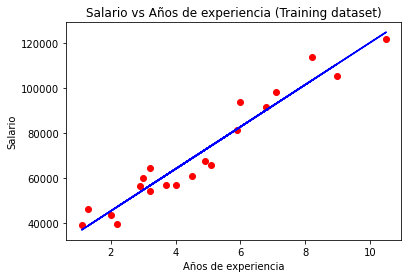

In [14]:
plt.scatter(x1_train,y1_train, color="red")
plt.plot(x1_train,reg.predict(x1_train), color='blue')
plt.title("Salario vs Años de experiencia (Training dataset)")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")

Visualización de resultados tomando conjunto de datos de evaluación

Text(0, 0.5, 'Salario')

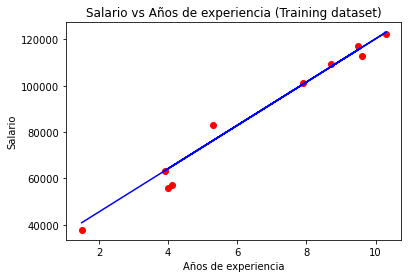

In [15]:
plt.scatter(x1_test,y1_test, color="red")
plt.plot(x1_test,reg.predict(x1_test), color='blue')
plt.title("Salario vs Años de experiencia (Training dataset)")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")